sivathorn siralert

# libraries and folders

In [61]:
import cv2
import os
import numpy as np
from google.colab import drive
from google.colab.patches import cv2_imshow
import json
import torch
from pathlib import Path
from matplotlib import pyplot as plt


# Mount Google Drive
drive.mount('/content/drive')

# Path to the folder containing the images
folder_path = "/content/drive/My Drive/shape_data/images"

# Check if the folder exists
if os.path.exists(folder_path):
    # Get a list of all file names in the folder
    file_names = os.listdir(folder_path)

    # Print the list of file names
    print("Files in the folder:")
    for file_name in file_names:
        print(file_name)
else:
    print("Folder does not exist:", folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in the folder:
random_shapes_21.png
random_shapes_14.png
ground_truth_mapping.json
random_shapes_22.png
random_shapes_29.png
random_shapes_17.png
random_shapes_26.png
random_shapes_7.png
random_shapes_34.png
random_shapes_15.png
random_shapes_2.png
random_shapes_9.png
random_shapes_10.png
random_shapes_19.png
random_shapes_6.png
random_shapes_5.png
random_shapes_4.png
random_shapes_28.png
random_shapes_24.png
random_shapes_8.png
random_shapes_3.png
random_shapes_11.png
random_shapes_32.png
random_shapes_1.png
random_shapes_23.png
random_shapes_13.png
random_shapes_20.png
random_shapes_16.png
random_shapes_18.png
random_shapes_30.png
random_shapes_12.png
random_shapes_33.png
random_shapes_35.png
random_shapes_27.png
random_shapes_25.png
random_shapes_0.png
random_shapes_31.png
random_shapes_60.png
random_shapes_38.png
random_shapes_47.png
random_shapes_4

# designing the algorithm (classic computer vision technique)

In [62]:
def detect_shapes(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to obtain binary image
    _, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize counters for circles, triangles, and squares
    circle_count = 0
    triangle_count = 0
    square_count = 0

    # Iterate through contours
    for contour in contours:
        # Approximate the contour to reduce the number of points
        epsilon = 0.04 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Determine the shape based on the number of vertices
        vertices = len(approx)
        if vertices >= 5:  # If vertices are more than 6, consider it a circle
            circle_count += 1
        elif vertices == 3:  # If vertices are 3, consider it a triangle
            triangle_count += 1
        elif vertices == 4:  # If vertices are 4, consider it a square
            square_count += 1

    return circle_count, triangle_count, square_count


def load_ground_truth(json_file):
    with open(json_file, 'r') as f:
        ground_truth = json.load(f)
    return ground_truth


using the algorithm

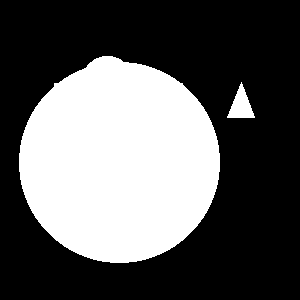

Circle count: 1
Triangle count: 1
Square count: 0


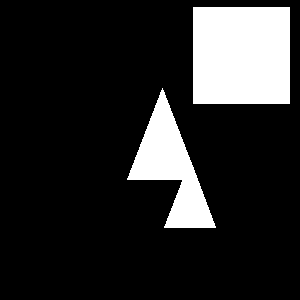

Circle count: 1
Triangle count: 0
Square count: 1


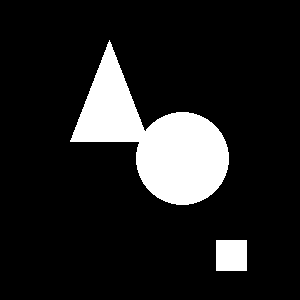

Circle count: 1
Triangle count: 0
Square count: 1


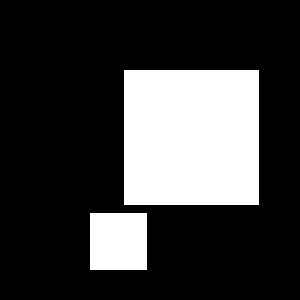

Circle count: 0
Triangle count: 0
Square count: 2


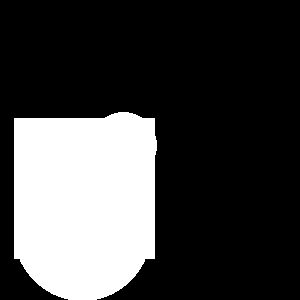

Circle count: 1
Triangle count: 0
Square count: 0


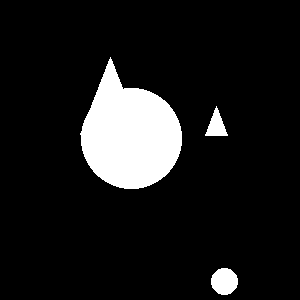

Circle count: 1
Triangle count: 1
Square count: 1


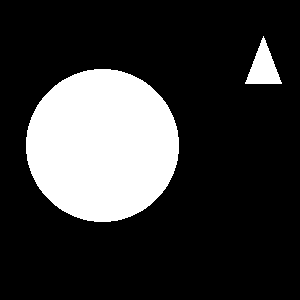

Circle count: 1
Triangle count: 1
Square count: 0


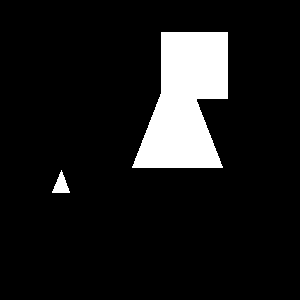

Circle count: 1
Triangle count: 1
Square count: 0


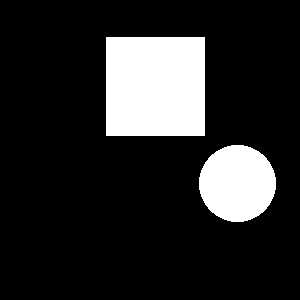

Circle count: 1
Triangle count: 0
Square count: 1


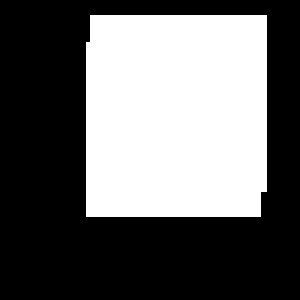

Circle count: 0
Triangle count: 0
Square count: 1


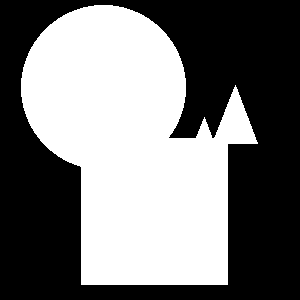

Circle count: 1
Triangle count: 0
Square count: 0


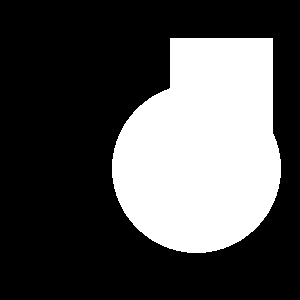

Circle count: 1
Triangle count: 0
Square count: 0


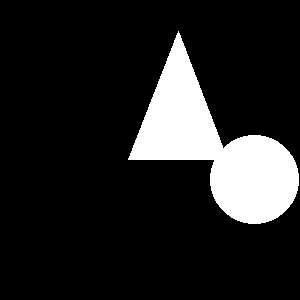

Circle count: 1
Triangle count: 0
Square count: 0


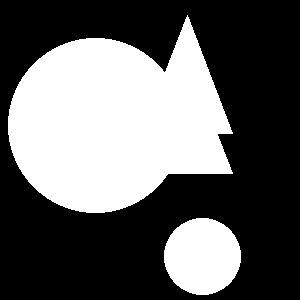

Circle count: 2
Triangle count: 0
Square count: 0


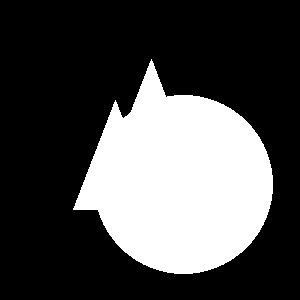

Circle count: 0
Triangle count: 0
Square count: 1


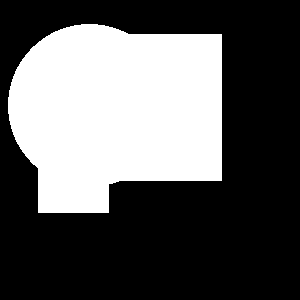

Circle count: 1
Triangle count: 0
Square count: 0


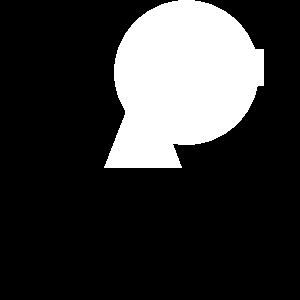

Circle count: 1
Triangle count: 0
Square count: 0


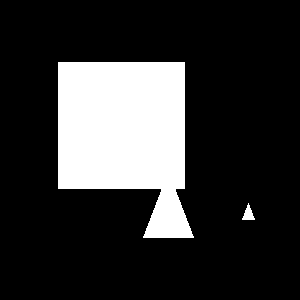

Circle count: 1
Triangle count: 1
Square count: 0


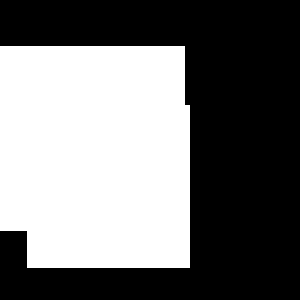

Circle count: 0
Triangle count: 0
Square count: 1


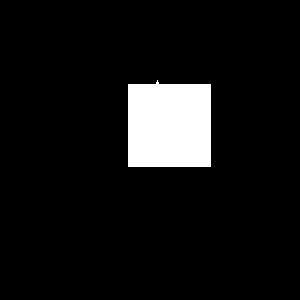

Circle count: 0
Triangle count: 0
Square count: 1


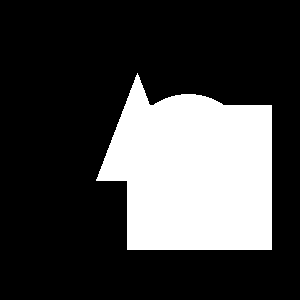

Circle count: 1
Triangle count: 0
Square count: 0


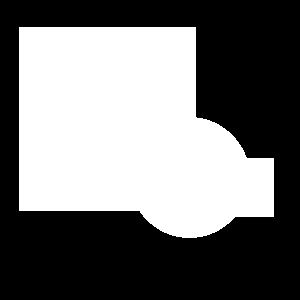

Circle count: 0
Triangle count: 0
Square count: 1


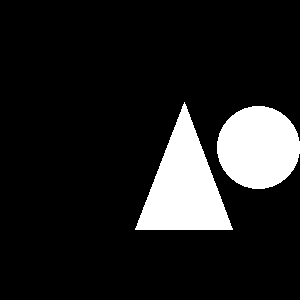

Circle count: 1
Triangle count: 1
Square count: 0


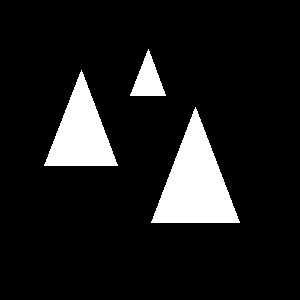

Circle count: 0
Triangle count: 3
Square count: 0


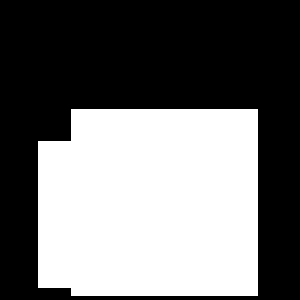

Circle count: 0
Triangle count: 0
Square count: 1


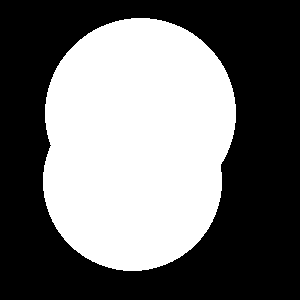

Circle count: 1
Triangle count: 0
Square count: 0


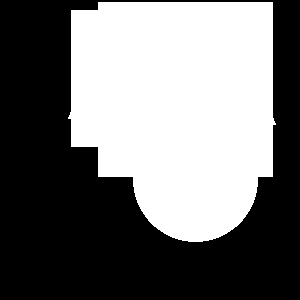

Circle count: 1
Triangle count: 0
Square count: 0


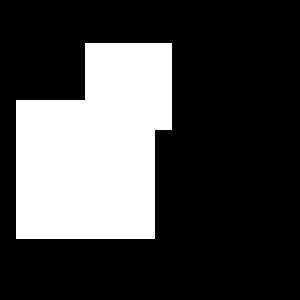

Circle count: 1
Triangle count: 0
Square count: 0


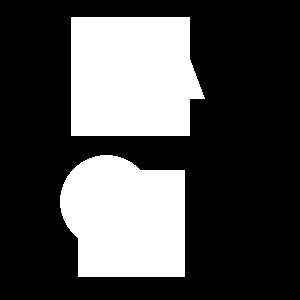

Circle count: 0
Triangle count: 0
Square count: 2


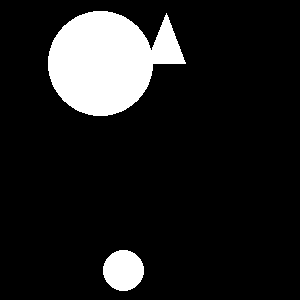

Circle count: 2
Triangle count: 0
Square count: 0


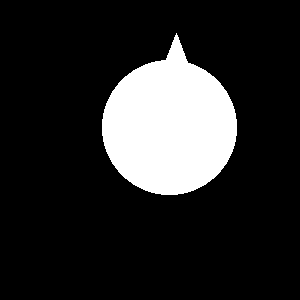

Circle count: 1
Triangle count: 0
Square count: 0


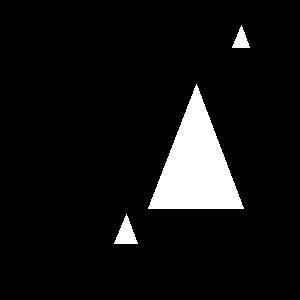

Circle count: 0
Triangle count: 3
Square count: 0


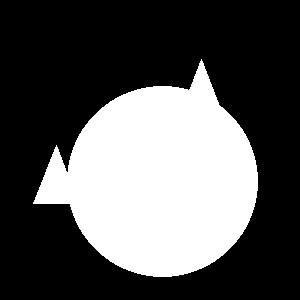

Circle count: 0
Triangle count: 0
Square count: 1


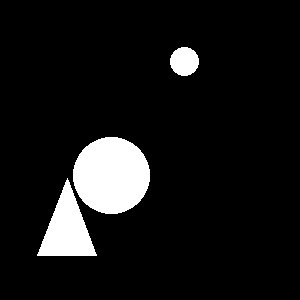

Circle count: 2
Triangle count: 1
Square count: 0


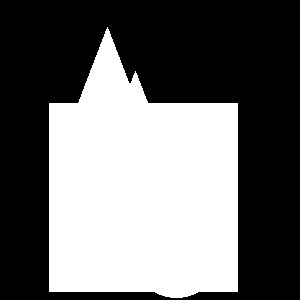

Circle count: 1
Triangle count: 0
Square count: 0


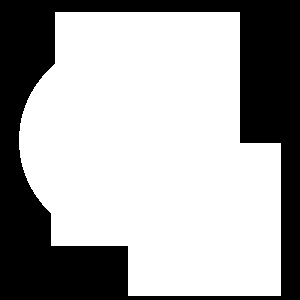

Circle count: 0
Triangle count: 0
Square count: 1


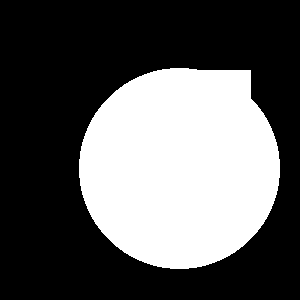

Circle count: 1
Triangle count: 0
Square count: 0


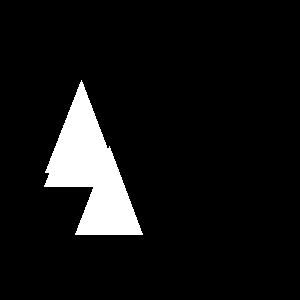

Circle count: 1
Triangle count: 0
Square count: 0


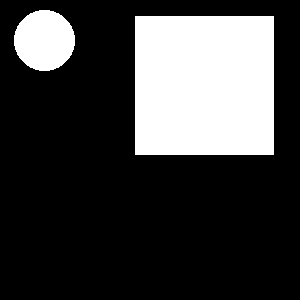

Circle count: 1
Triangle count: 0
Square count: 1


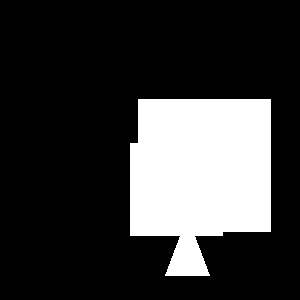

Circle count: 1
Triangle count: 0
Square count: 0


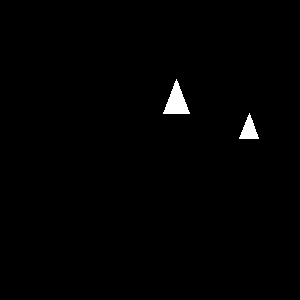

Circle count: 0
Triangle count: 2
Square count: 0


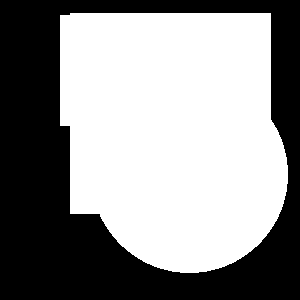

Circle count: 1
Triangle count: 0
Square count: 0


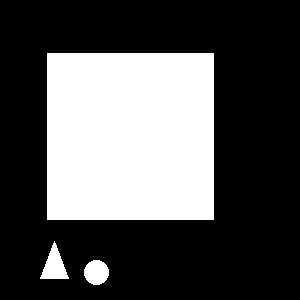

Circle count: 1
Triangle count: 1
Square count: 1


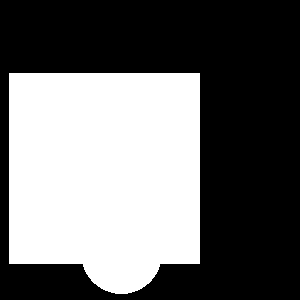

Circle count: 0
Triangle count: 0
Square count: 1


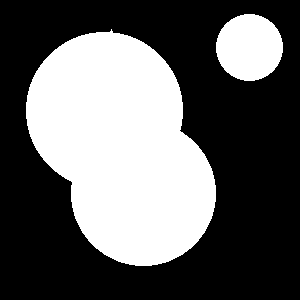

Circle count: 2
Triangle count: 0
Square count: 0


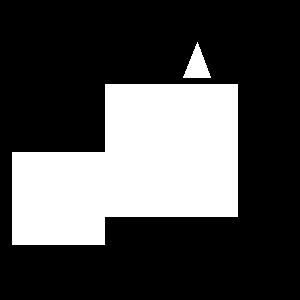

Circle count: 1
Triangle count: 1
Square count: 0


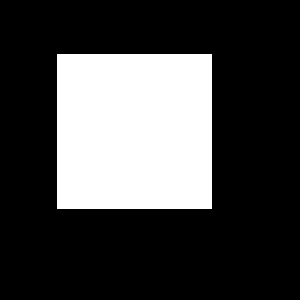

Circle count: 0
Triangle count: 0
Square count: 1


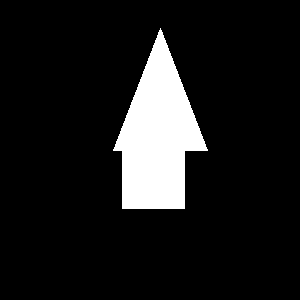

Circle count: 1
Triangle count: 0
Square count: 0


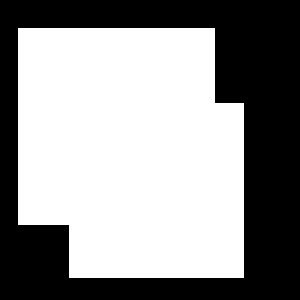

Circle count: 1
Triangle count: 0
Square count: 0


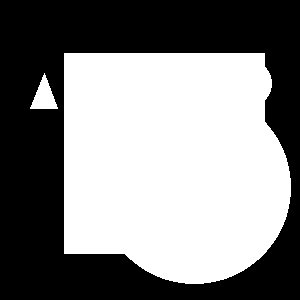

Circle count: 0
Triangle count: 1
Square count: 1


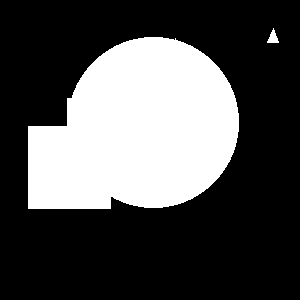

Circle count: 1
Triangle count: 1
Square count: 0


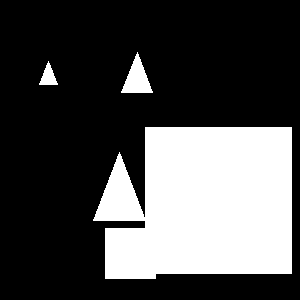

Circle count: 1
Triangle count: 2
Square count: 0


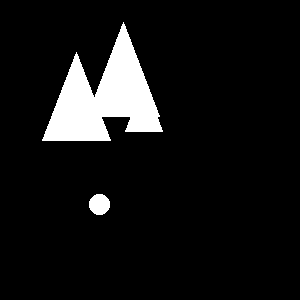

Circle count: 2
Triangle count: 0
Square count: 0


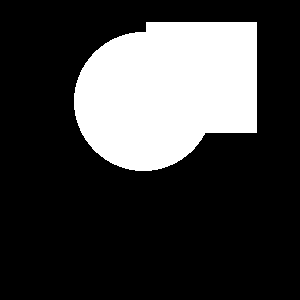

Circle count: 1
Triangle count: 0
Square count: 0


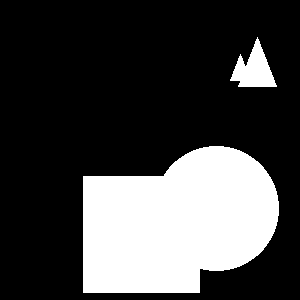

Circle count: 2
Triangle count: 0
Square count: 0


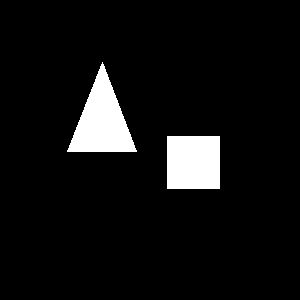

Circle count: 0
Triangle count: 1
Square count: 1


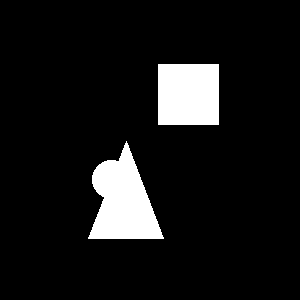

Circle count: 1
Triangle count: 0
Square count: 1


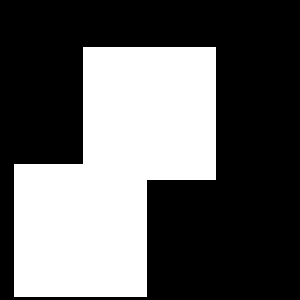

Circle count: 0
Triangle count: 0
Square count: 1


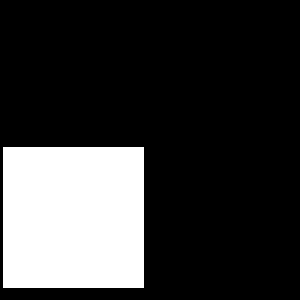

Circle count: 0
Triangle count: 0
Square count: 1


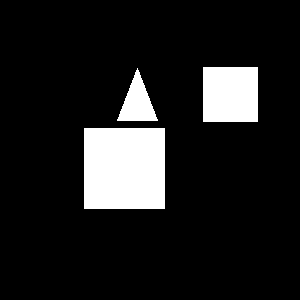

Circle count: 0
Triangle count: 1
Square count: 2


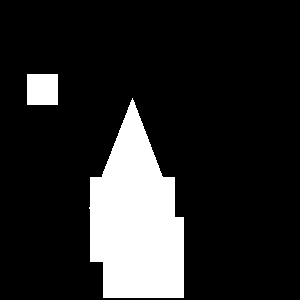

Circle count: 0
Triangle count: 0
Square count: 2


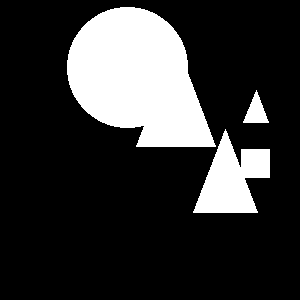

Circle count: 1
Triangle count: 1
Square count: 1


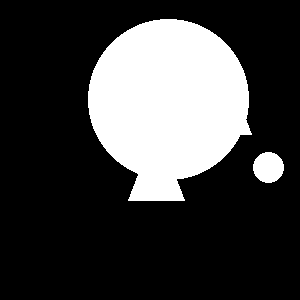

Circle count: 2
Triangle count: 0
Square count: 0


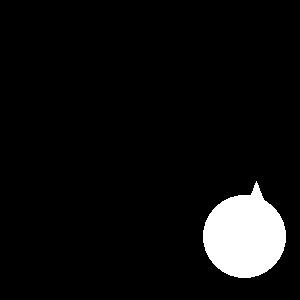

Circle count: 1
Triangle count: 0
Square count: 0


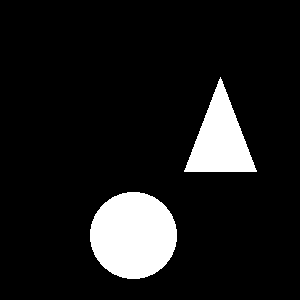

Circle count: 1
Triangle count: 1
Square count: 0


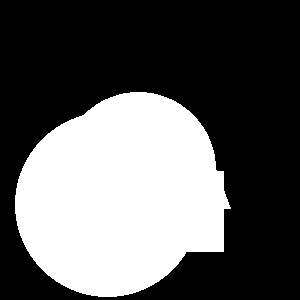

Circle count: 0
Triangle count: 0
Square count: 1


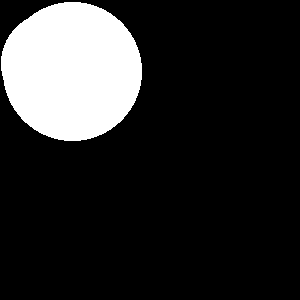

Circle count: 1
Triangle count: 0
Square count: 0


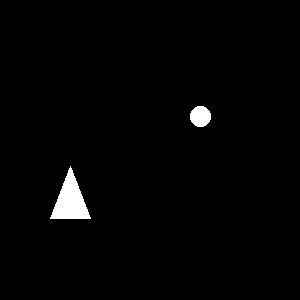

Circle count: 1
Triangle count: 1
Square count: 0


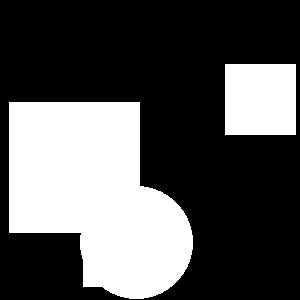

Circle count: 1
Triangle count: 0
Square count: 1


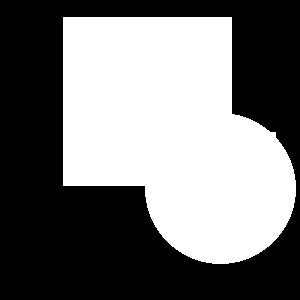

Circle count: 1
Triangle count: 0
Square count: 0


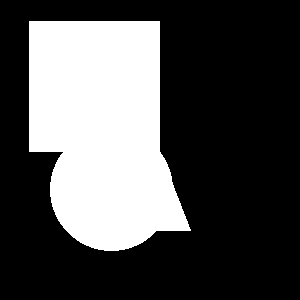

Circle count: 0
Triangle count: 0
Square count: 1


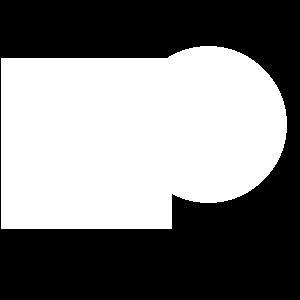

Circle count: 0
Triangle count: 0
Square count: 1


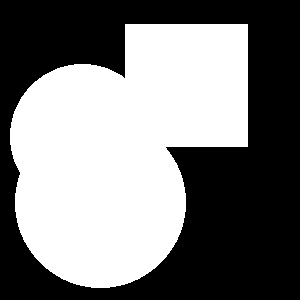

Circle count: 1
Triangle count: 0
Square count: 0


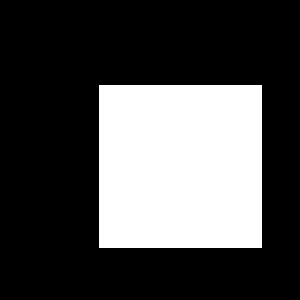

Circle count: 0
Triangle count: 0
Square count: 1


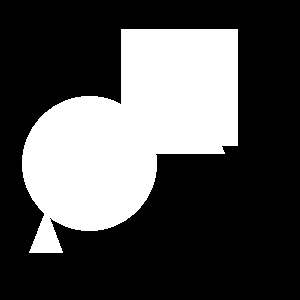

Circle count: 1
Triangle count: 0
Square count: 0


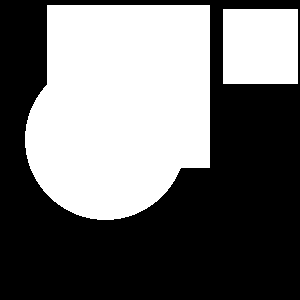

Circle count: 1
Triangle count: 0
Square count: 1


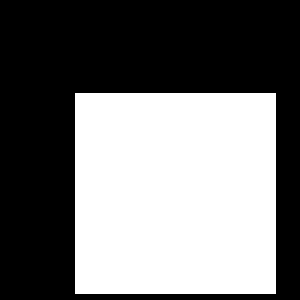

Circle count: 0
Triangle count: 0
Square count: 1


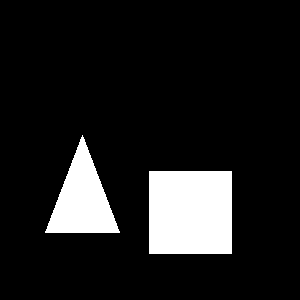

Circle count: 0
Triangle count: 1
Square count: 1


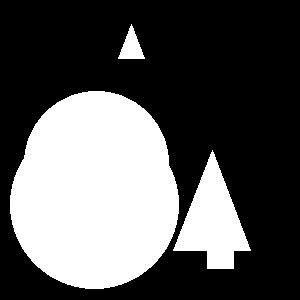

Circle count: 1
Triangle count: 1
Square count: 1


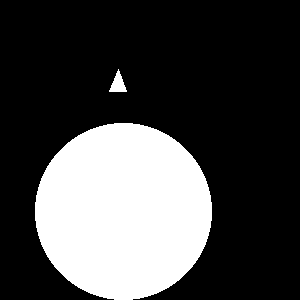

Circle count: 1
Triangle count: 1
Square count: 0


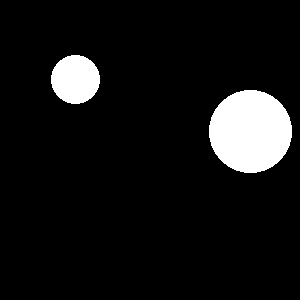

Circle count: 2
Triangle count: 0
Square count: 0


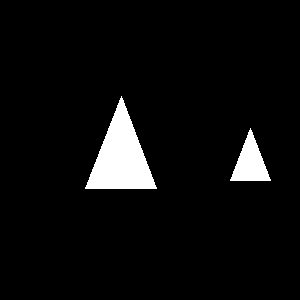

Circle count: 0
Triangle count: 2
Square count: 0


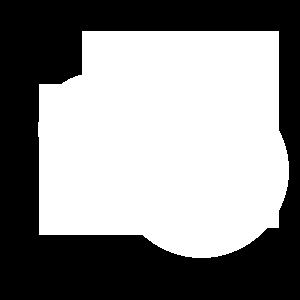

Circle count: 1
Triangle count: 0
Square count: 0


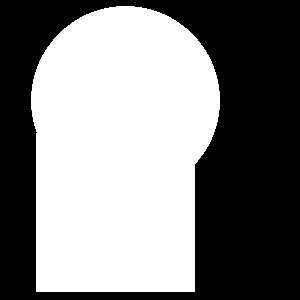

Circle count: 1
Triangle count: 0
Square count: 0


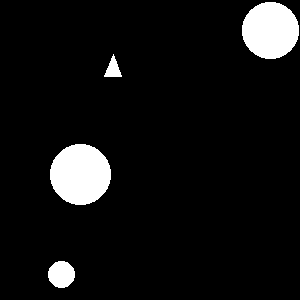

Circle count: 3
Triangle count: 1
Square count: 0


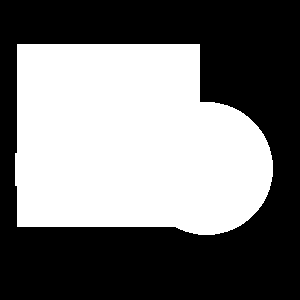

Circle count: 0
Triangle count: 0
Square count: 1


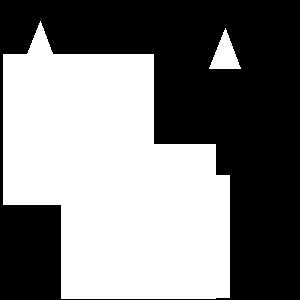

Circle count: 1
Triangle count: 1
Square count: 0


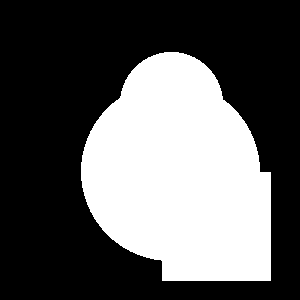

Circle count: 1
Triangle count: 0
Square count: 0


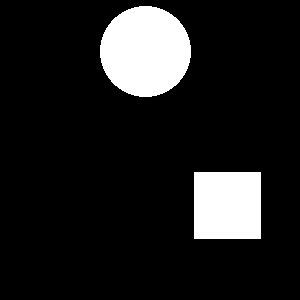

Circle count: 1
Triangle count: 0
Square count: 1


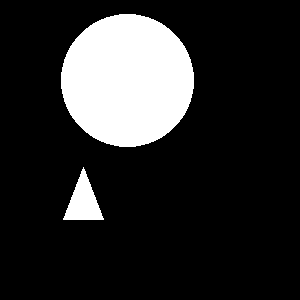

Circle count: 1
Triangle count: 1
Square count: 0


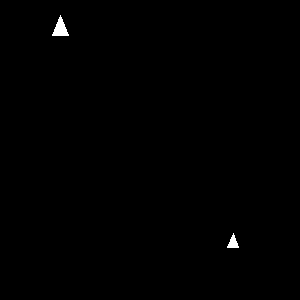

Circle count: 0
Triangle count: 2
Square count: 0


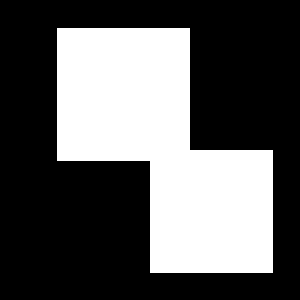

Circle count: 1
Triangle count: 0
Square count: 0


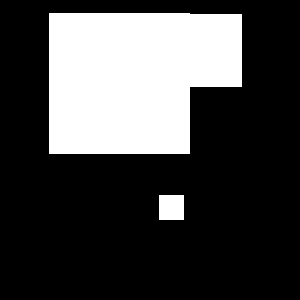

Circle count: 1
Triangle count: 0
Square count: 1


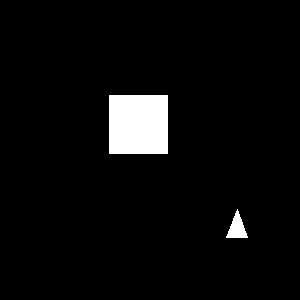

Circle count: 0
Triangle count: 1
Square count: 1


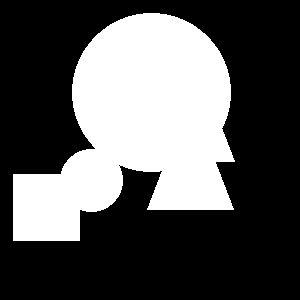

Circle count: 1
Triangle count: 0
Square count: 0


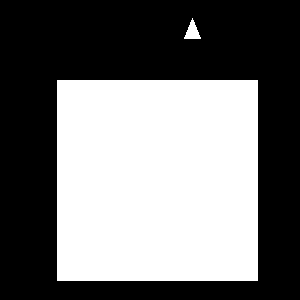

Circle count: 0
Triangle count: 1
Square count: 1


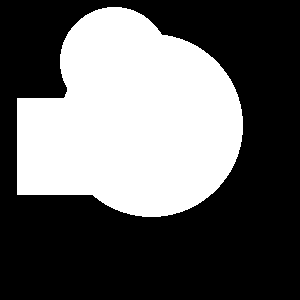

Circle count: 1
Triangle count: 0
Square count: 0


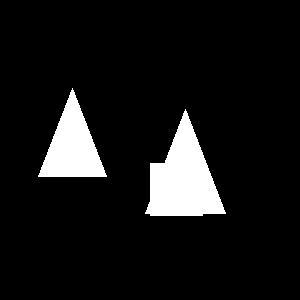

Circle count: 0
Triangle count: 1
Square count: 1


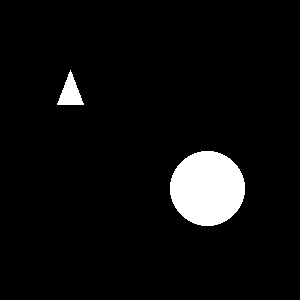

Circle count: 1
Triangle count: 1
Square count: 0


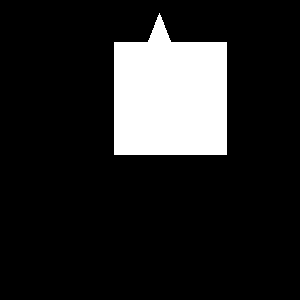

Circle count: 1
Triangle count: 0
Square count: 0

accuarcy : 0.0


In [63]:
# Path to the JSON file in Google Drive
json_file_path = '/content/drive/My Drive/shape_data/images/ground_truth_mapping.json'

# Load ground truth data from JSON file
ground_truth = load_ground_truth(json_file_path)
total_images = len(ground_truth)
correct_predictions = 0

# Iterate over each file in the folder
for file_name in file_names:
    # Construct the full path to the image file
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is an image (you may want to add additional checks here)
    if file_name.lower().endswith('.png'):
        # Read the image using OpenCV
        image = cv2.imread(file_path)

        # Display the image (optional)
        if image is not None:
            cv2_imshow(image)
            # cv2.imshow("Image", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Failed to read the image: {file_name}")

        # Detect shapes
        circle_count, triangle_count, square_count = detect_shapes(image)
        if (circle_count, triangle_count, square_count) == ground_truth[file_name]:
          correct_predictions += 1

        # Print the counts
        print("Circle count:", circle_count)
        print("Triangle count:", triangle_count)
        print("Square count:", square_count)

# Evaluate performance
accuracy = correct_predictions / total_images

print("")
print('accuarcy :', accuracy)


comments:

this method is unable to handle overlapping shapes and will automatically consider overlapping shapes as circles due to the sentinel condition of "6 or more vertices=circle"

the accuracy displays as 0 as i am unable to troubleshoot my error of not being able to count the number of matching anotations between my predicted ones and the truth anotation provided

however, by bruteforce counting, i calculated an accuracy of 29/99 or 29.2%.

# trying out another method

In [64]:
def detect_shapes_v2(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image to obtain binary image
    _, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    circle_count = 0
    triangle_count = 0
    square_count = 0

    # list for storing names of shapes
    for contour in contours:

        # cv2.approxPloyDP() function to approximate the shape
        approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)


        # counting the shapes for each image
        if len(approx) == 3:
          triangle_count += 1

        elif len(approx) == 4:
          square_count += 1

        else:
          circle_count += 1

    return circle_count, triangle_count, square_count

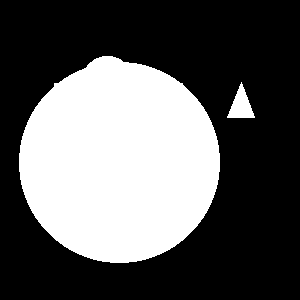

Circle count: 1
Triangle count: 1
Square count: 0


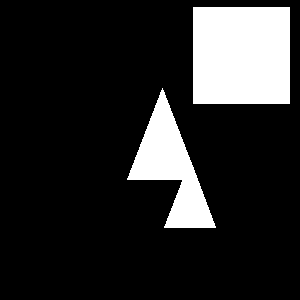

Circle count: 1
Triangle count: 0
Square count: 1


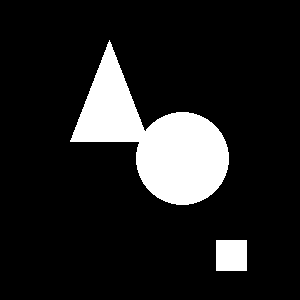

Circle count: 1
Triangle count: 0
Square count: 1


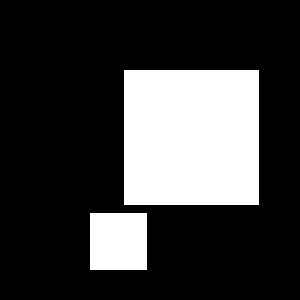

Circle count: 0
Triangle count: 0
Square count: 2


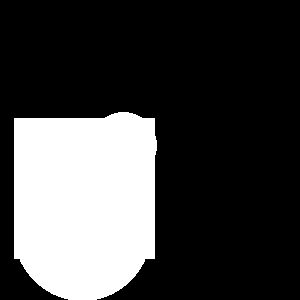

Circle count: 1
Triangle count: 0
Square count: 0


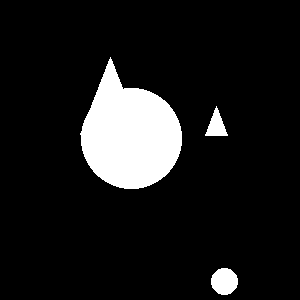

Circle count: 2
Triangle count: 1
Square count: 0


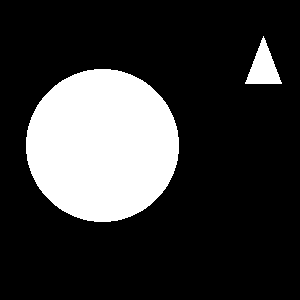

Circle count: 1
Triangle count: 1
Square count: 0


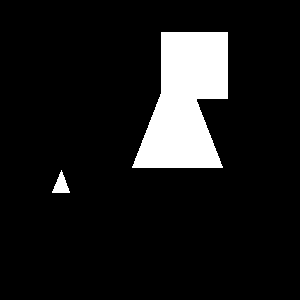

Circle count: 2
Triangle count: 0
Square count: 0


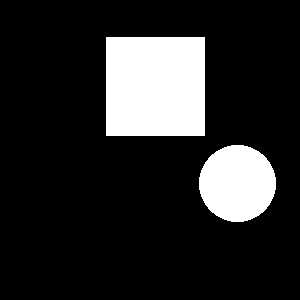

Circle count: 1
Triangle count: 0
Square count: 1


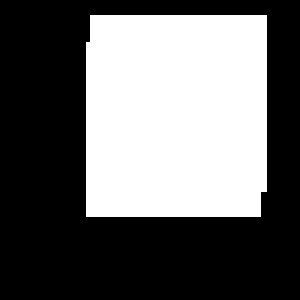

Circle count: 0
Triangle count: 0
Square count: 1


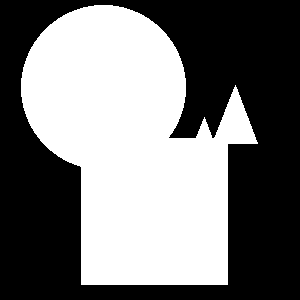

Circle count: 1
Triangle count: 0
Square count: 0


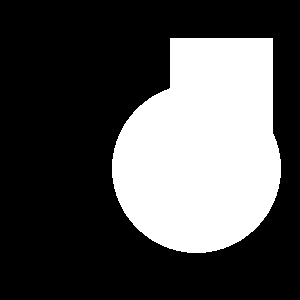

Circle count: 1
Triangle count: 0
Square count: 0


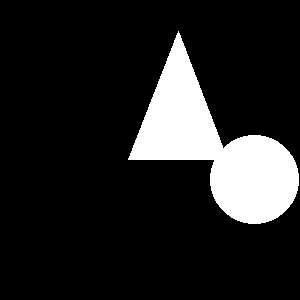

Circle count: 1
Triangle count: 0
Square count: 0


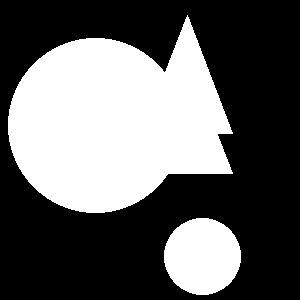

Circle count: 2
Triangle count: 0
Square count: 0


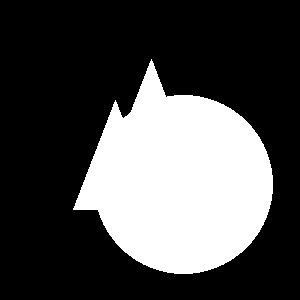

Circle count: 1
Triangle count: 0
Square count: 0


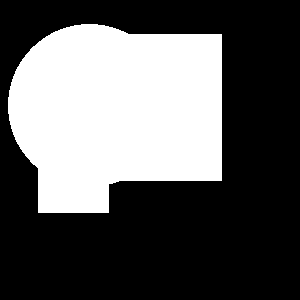

Circle count: 1
Triangle count: 0
Square count: 0


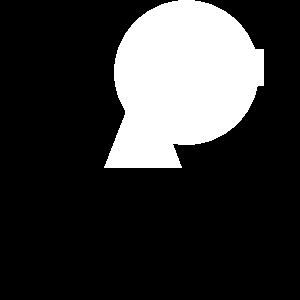

Circle count: 1
Triangle count: 0
Square count: 0


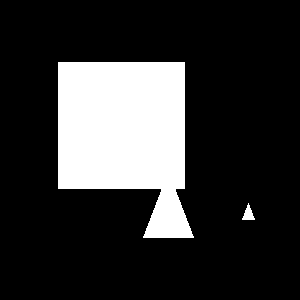

Circle count: 2
Triangle count: 0
Square count: 0


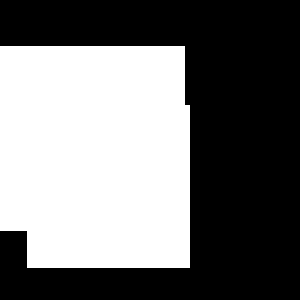

Circle count: 1
Triangle count: 0
Square count: 0


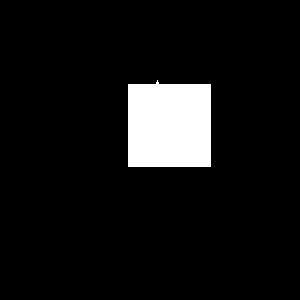

Circle count: 0
Triangle count: 0
Square count: 1


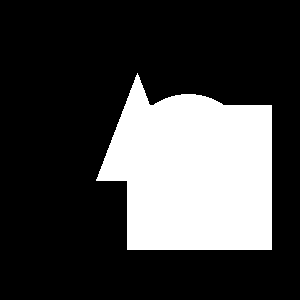

Circle count: 1
Triangle count: 0
Square count: 0


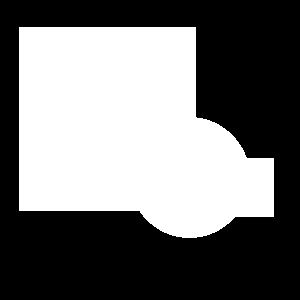

Circle count: 1
Triangle count: 0
Square count: 0


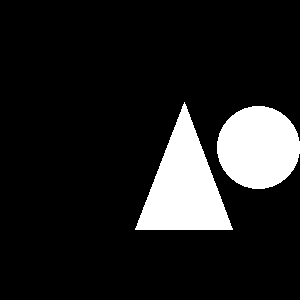

Circle count: 1
Triangle count: 1
Square count: 0


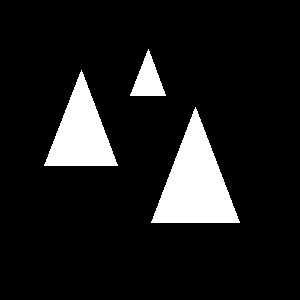

Circle count: 0
Triangle count: 3
Square count: 0


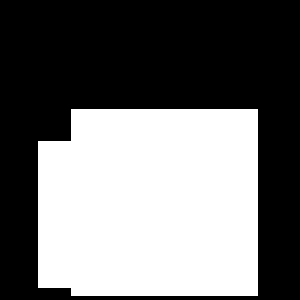

Circle count: 1
Triangle count: 0
Square count: 0


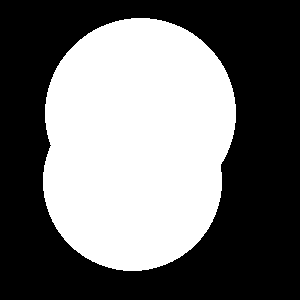

Circle count: 1
Triangle count: 0
Square count: 0


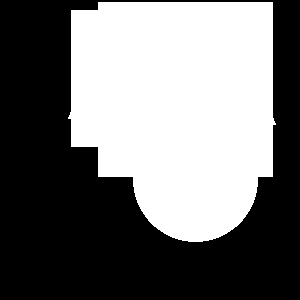

Circle count: 1
Triangle count: 0
Square count: 0


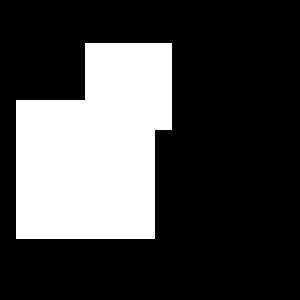

Circle count: 1
Triangle count: 0
Square count: 0


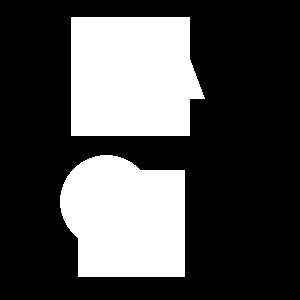

Circle count: 2
Triangle count: 0
Square count: 0


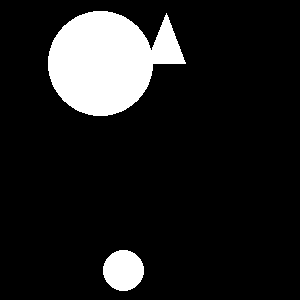

Circle count: 2
Triangle count: 0
Square count: 0


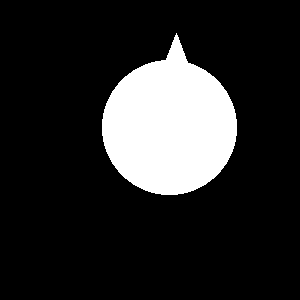

Circle count: 1
Triangle count: 0
Square count: 0


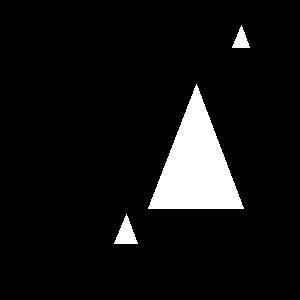

Circle count: 1
Triangle count: 2
Square count: 0


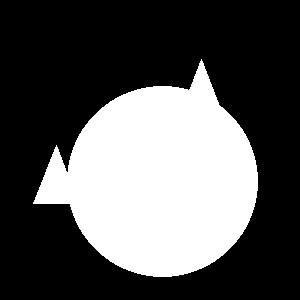

Circle count: 1
Triangle count: 0
Square count: 0


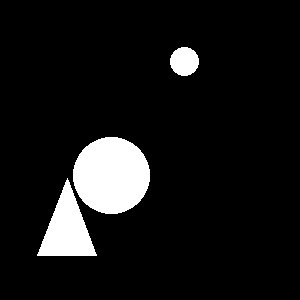

Circle count: 2
Triangle count: 1
Square count: 0


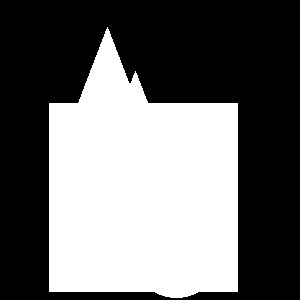

Circle count: 1
Triangle count: 0
Square count: 0


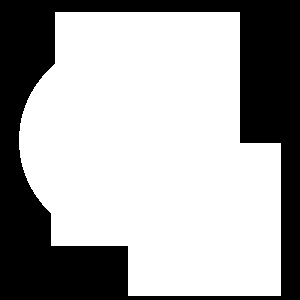

Circle count: 1
Triangle count: 0
Square count: 0


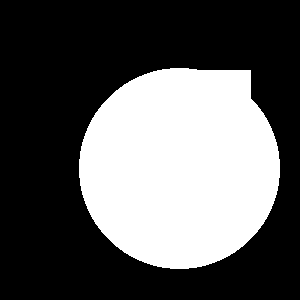

Circle count: 1
Triangle count: 0
Square count: 0


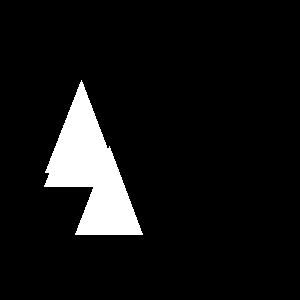

Circle count: 1
Triangle count: 0
Square count: 0


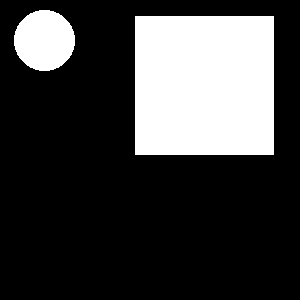

Circle count: 1
Triangle count: 0
Square count: 1


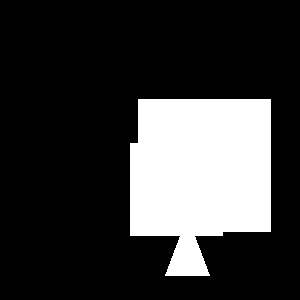

Circle count: 1
Triangle count: 0
Square count: 0


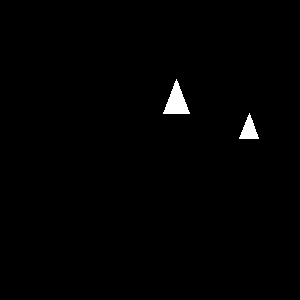

Circle count: 0
Triangle count: 1
Square count: 1


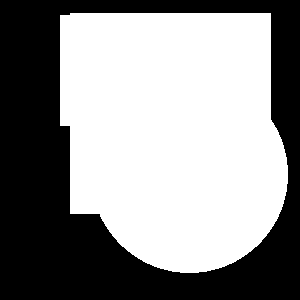

Circle count: 1
Triangle count: 0
Square count: 0


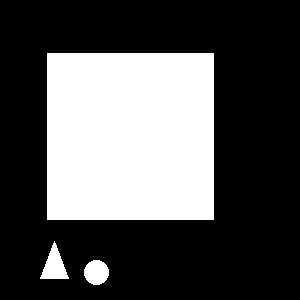

Circle count: 1
Triangle count: 1
Square count: 1


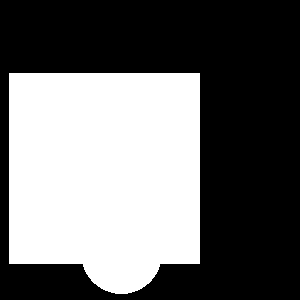

Circle count: 1
Triangle count: 0
Square count: 0


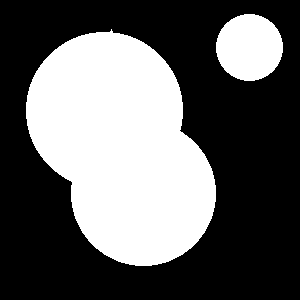

Circle count: 2
Triangle count: 0
Square count: 0


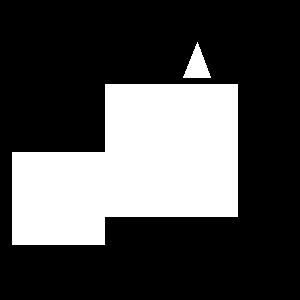

Circle count: 1
Triangle count: 1
Square count: 0


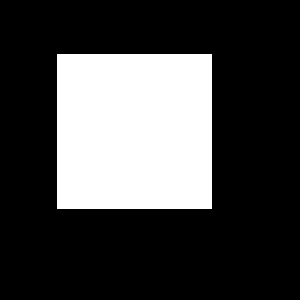

Circle count: 0
Triangle count: 0
Square count: 1


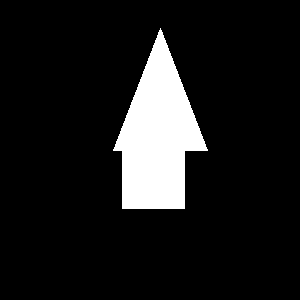

Circle count: 1
Triangle count: 0
Square count: 0


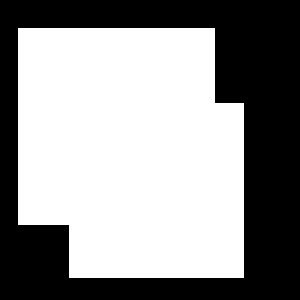

Circle count: 1
Triangle count: 0
Square count: 0


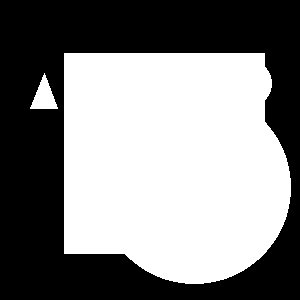

Circle count: 1
Triangle count: 1
Square count: 0


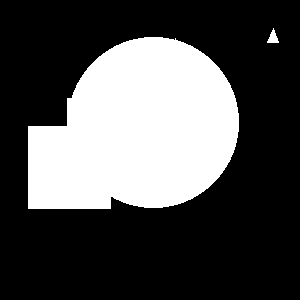

Circle count: 2
Triangle count: 0
Square count: 0


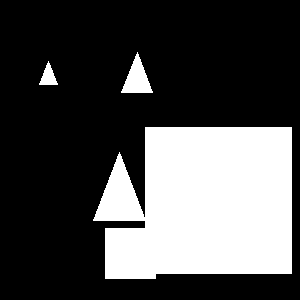

Circle count: 2
Triangle count: 1
Square count: 0


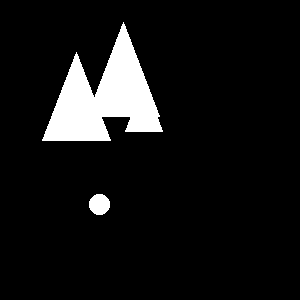

Circle count: 2
Triangle count: 0
Square count: 0


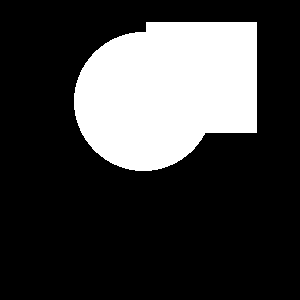

Circle count: 1
Triangle count: 0
Square count: 0


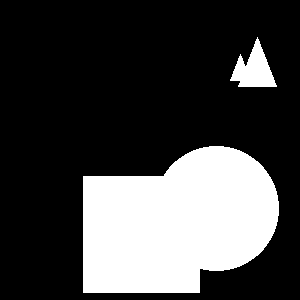

Circle count: 2
Triangle count: 0
Square count: 0


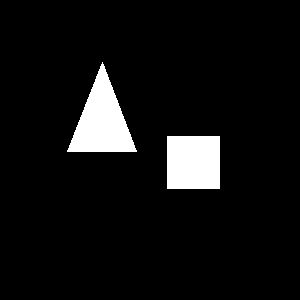

Circle count: 0
Triangle count: 1
Square count: 1


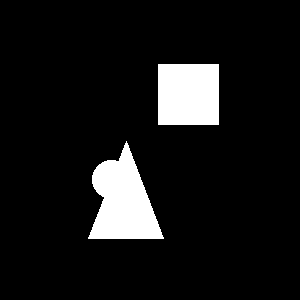

Circle count: 1
Triangle count: 0
Square count: 1


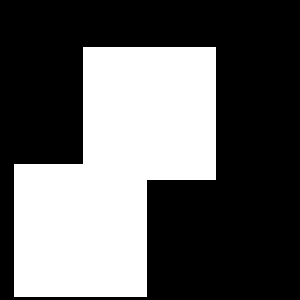

Circle count: 1
Triangle count: 0
Square count: 0


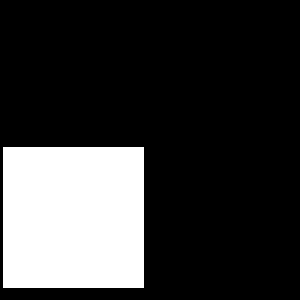

Circle count: 0
Triangle count: 0
Square count: 1


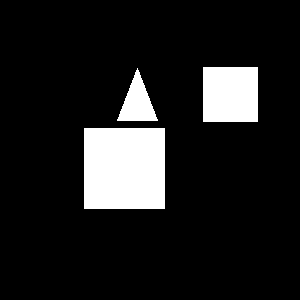

Circle count: 0
Triangle count: 1
Square count: 2


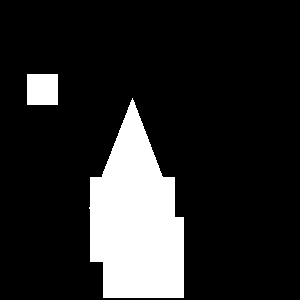

Circle count: 1
Triangle count: 0
Square count: 1


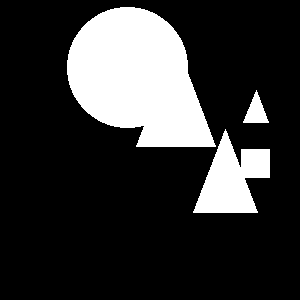

Circle count: 2
Triangle count: 1
Square count: 0


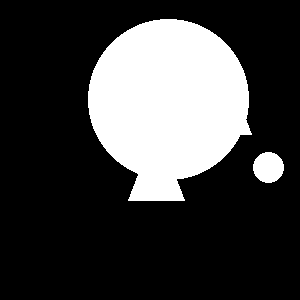

Circle count: 2
Triangle count: 0
Square count: 0


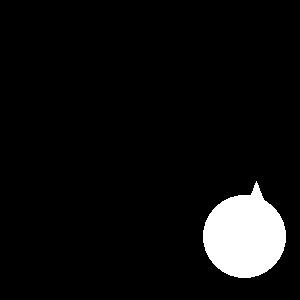

Circle count: 1
Triangle count: 0
Square count: 0


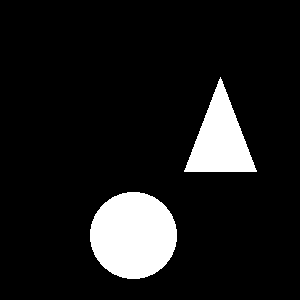

Circle count: 1
Triangle count: 1
Square count: 0


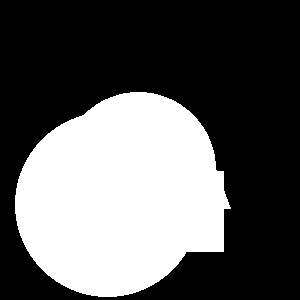

Circle count: 1
Triangle count: 0
Square count: 0


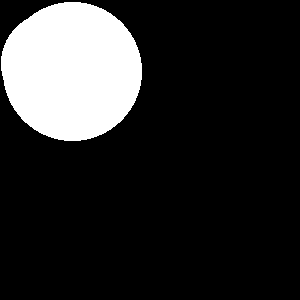

Circle count: 1
Triangle count: 0
Square count: 0


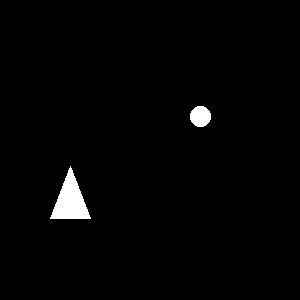

Circle count: 1
Triangle count: 1
Square count: 0


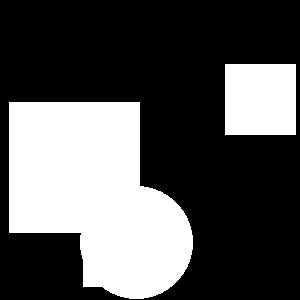

Circle count: 1
Triangle count: 0
Square count: 1


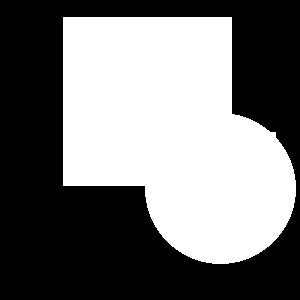

Circle count: 1
Triangle count: 0
Square count: 0


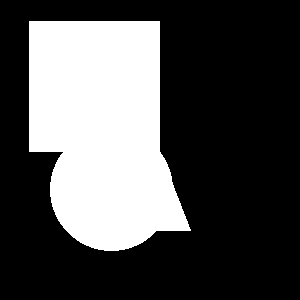

Circle count: 1
Triangle count: 0
Square count: 0


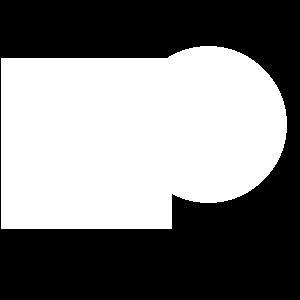

Circle count: 1
Triangle count: 0
Square count: 0


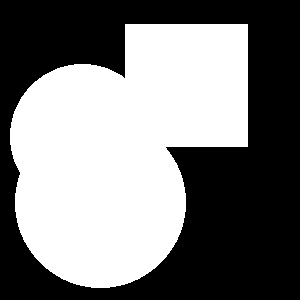

Circle count: 1
Triangle count: 0
Square count: 0


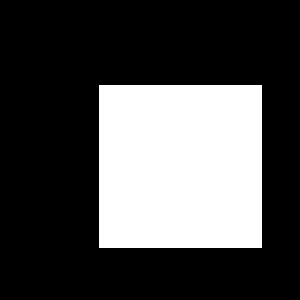

Circle count: 0
Triangle count: 0
Square count: 1


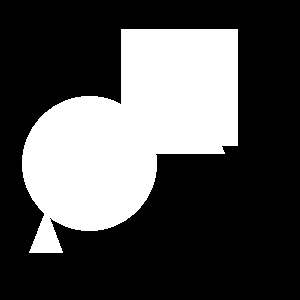

Circle count: 1
Triangle count: 0
Square count: 0


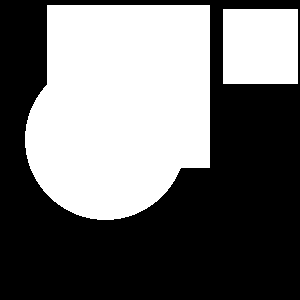

Circle count: 1
Triangle count: 0
Square count: 1


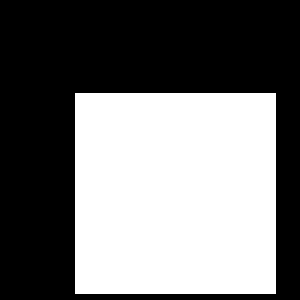

Circle count: 0
Triangle count: 0
Square count: 1


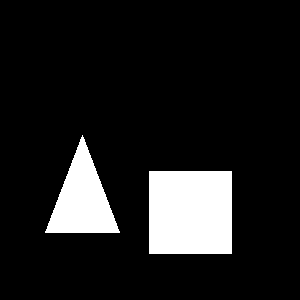

Circle count: 0
Triangle count: 1
Square count: 1


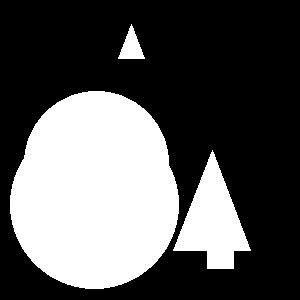

Circle count: 2
Triangle count: 1
Square count: 0


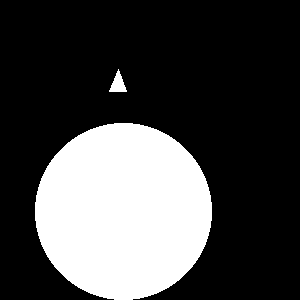

Circle count: 2
Triangle count: 0
Square count: 0


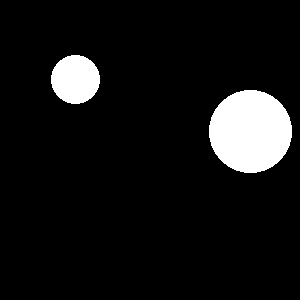

Circle count: 2
Triangle count: 0
Square count: 0


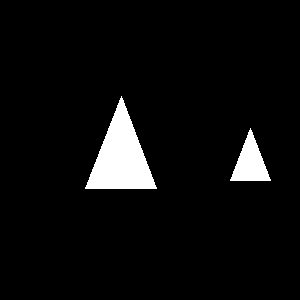

Circle count: 0
Triangle count: 2
Square count: 0


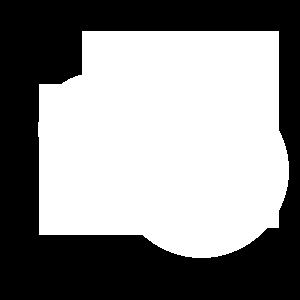

Circle count: 1
Triangle count: 0
Square count: 0


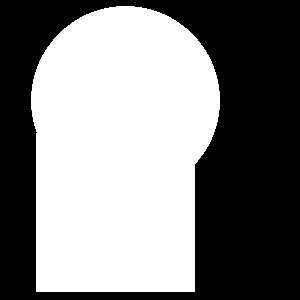

Circle count: 1
Triangle count: 0
Square count: 0


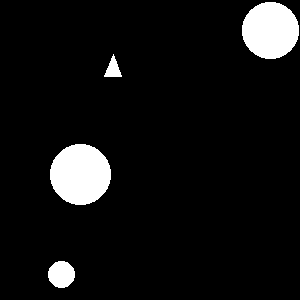

Circle count: 4
Triangle count: 0
Square count: 0


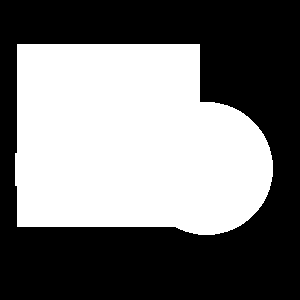

Circle count: 1
Triangle count: 0
Square count: 0


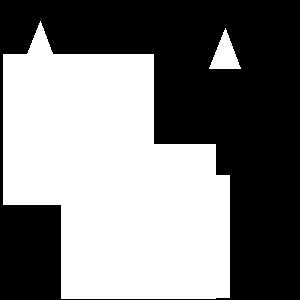

Circle count: 1
Triangle count: 1
Square count: 0


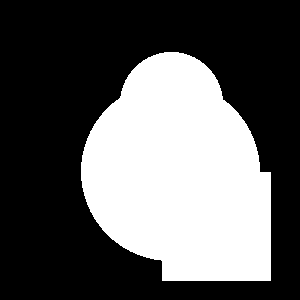

Circle count: 1
Triangle count: 0
Square count: 0


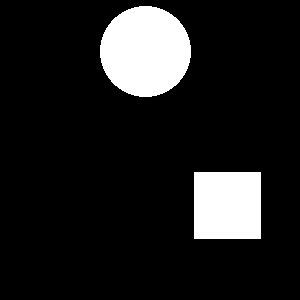

Circle count: 1
Triangle count: 0
Square count: 1


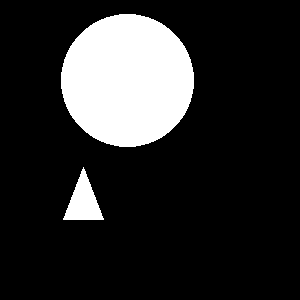

Circle count: 1
Triangle count: 1
Square count: 0


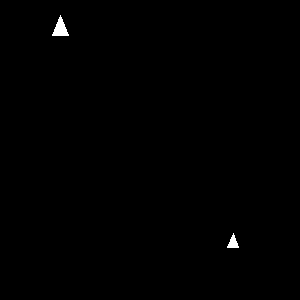

Circle count: 2
Triangle count: 0
Square count: 0


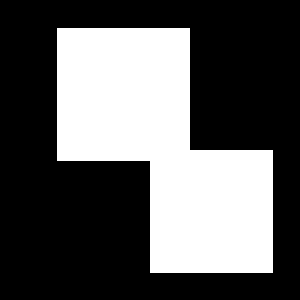

Circle count: 1
Triangle count: 0
Square count: 0


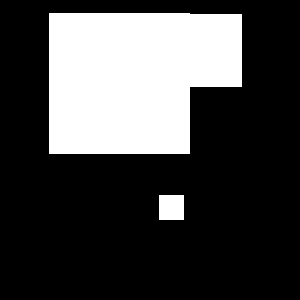

Circle count: 1
Triangle count: 0
Square count: 1


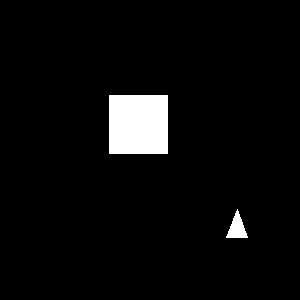

Circle count: 0
Triangle count: 1
Square count: 1


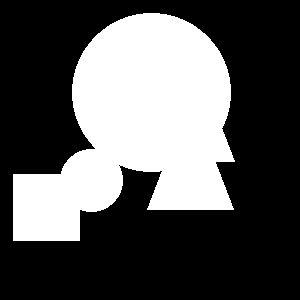

Circle count: 1
Triangle count: 0
Square count: 0


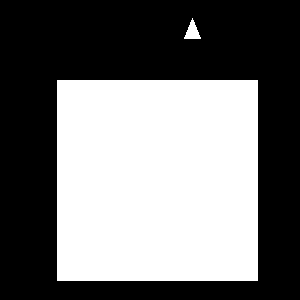

Circle count: 1
Triangle count: 0
Square count: 1


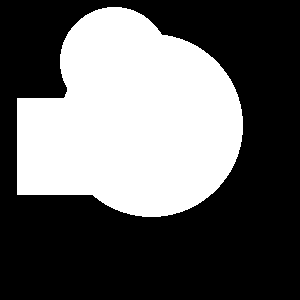

Circle count: 1
Triangle count: 0
Square count: 0


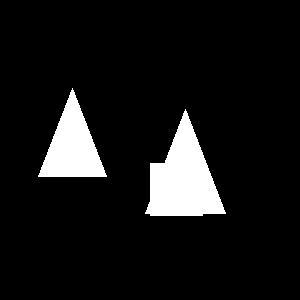

Circle count: 1
Triangle count: 1
Square count: 0


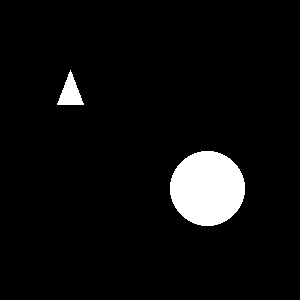

Circle count: 1
Triangle count: 1
Square count: 0


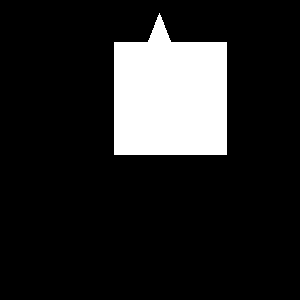

Circle count: 1
Triangle count: 0
Square count: 0

accuarcy : 0.0


In [65]:
correct_predictions = 0

# Iterate over each file in the folder
for file_name in file_names:
    # Construct the full path to the image file
    file_path = os.path.join(folder_path, file_name)

    # Check if the file is an image (you may want to add additional checks here)
    if file_name.lower().endswith('.png'):
        # Read the image using OpenCV
        image = cv2.imread(file_path)

        # Display the image (optional)
        if image is not None:
            cv2_imshow(image)
            # cv2.imshow("Image", image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print(f"Failed to read the image: {file_name}")

        # Detect shapes
        circle_count, triangle_count, square_count = detect_shapes_v2(image)
        if (circle_count, triangle_count, square_count) == ground_truth[file_name]:
          correct_predictions += 1

        # Print the counts
        print("Circle count:", circle_count)
        print("Triangle count:", triangle_count)
        print("Square count:", square_count)

# Evaluate performance
accuracy = correct_predictions / total_images

print("")
print('accuarcy :', accuracy)


similar to above, the accuracy shows 0% due to an error i am unable to troubleshoot.

by bruteforce counting, i got an accuracy of 23/99 or 23.2%.

# conclusion:

-my first model is more accurate. it functions by calculating the vertices of a shape and estimating the shape based on the number. it has a 100% prediction rate GIVEN that there are no overlapping shapes. when the shapes overlap, its accuracy dips significantly. an explanation i can provide is that by overlapping shapes, the algorithm assumes its a singular shapes and counts all vertices, resulting in an abnormal number of shapes. for example, a square and a triangle may overlap, resulting in 5 vertices instead of 3 and 4. this results in the algrotithm classifying it as a circle due to the nature of the sentinel restrictions i set in the algorithm's if else cotrol. in fringe cases, a smaller shape overlaps with a significantly larger shape, causing the algrotihm to miss that smaller shape and accuartely determining the shape of the larger shape. this however still results in an overall wrong prediction as it does not recognise and predict the smaller shapes. (ie: it guesses 2 shapes out of 3 correctly due to the algorithm mistakenly missing the small shape)

-on the other hand, the second mother functions by estimating the shapes through the contours. this model has an worse performance. similar to the above model, this model also suffers when it comes to overlapping shapes. an additional flaw that i have noticed is that this model is unable to accurately estimate shapes of very very small sizes, often misclasifying very small triangles and squares as circles, resulting in this algorithm having worse performance than the first one.

# Afterword:

one other method i can use for this problem would be deep learning using convolutional neural network. as this method is outside my curiculum, i did my own research on how to use this method. however, i will be completely transparent and admit that i found difficulty in implementing this CNN and am unable to produce a working code. I would however love to have an opportunity to touch on CNN and learn firsthand from seniors if i were given the internship role.

I will share what i have learnt from my research of the CNN method.



# YOLO research
YOLO shares the same abbreviation as the buzzword from the early 20s, you oly live once, but in this context, it means you only look once. it is a groundbreaking CNN mechanism that is very efficient for image recognition problems. it functions by dividing images into a grid, and assigning values to each grid including: confidence score(probability of an actual object existing in said grid) and class probabilites, which are basically the chance of a label being correct for the object in its grid.

the first step to using this method is to provide a training set for supervised learning. this is done by preparing (in the context of this problem) images of clear white shapes in a black background clearly labeled in a txt file for annotations with the following format: class(triangle/square/circle) x_center y_center width height.

next i imported the YOLO5 repository from github using thw foloowing code:

\
git clone https://github.com/ultralytics/yolov5.git

cd yolov5

pip install -r requirements.txt

i then created yaml files for my dataset like the code shown below:

\

train: C:/Users/acer/Desktop/sertis/YOLO/data/images/train

val: C:/Users/acer/Desktop/sertis/YOLO//data/images/val

nc: 3

names: ['circle', 'triangle', 'square']

\

which is then followed up by the command to train the model (note the backslash to escape the # from turning that line into a header in this notebook

\

import torch

/# Train YOLOv5s on the custom dataset for 100 epochs

!python train.py --img 640 --batch 16 --epochs 100 --data data/shapes.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name shapes-detector

whcih is then followed up with the followign command to evaluate the model
/# Run validation

!python val.py --weights runs/train/shapes-detector/weights/best.pt --data data/shapes.yaml --img 640 --batch 16

import torch

from pathlib import Path


from this point onwards, i will perform the standard data analytics architecture of loading the testing on the provided dataset of images.


In [ ]:
#code from my attempt to use YOLO CNN
# correct_predictions = 0

# # Load the trained model
# model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/shapes-detector/weights/best.pt')

# # Iterate over each file in the folder
# for file_name in file_names:
#     # Construct the full path to the image file
#     file_path = os.path.join(folder_path, file_name)

#     # Check if the file is an image (you may want to add additional checks here)
#     if file_name.lower().endswith('.png'):
#         # Read the image using OpenCV
#         image = cv2.imread(file_path)

#         # Display the image (optional)
#         if image is not None:
#             cv2_imshow(image)
#             # cv2.imshow("Image", image)
#             cv2.waitKey(0)
#             cv2.destroyAllWindows()
#         else:
#             print(f"Failed to read the image: {file_name}")

#         # Detect shapes
#         # Perform inference
#         results = model(image)
#         results.print()
#         results.show()

#         # Save results to a file
#         results.save(Path('runs/inference'))

#         if results[file_name] == ground_truth[file_name]:
#           correct_predictions += 1

#         # # Print the counts
#         # print("Circle count:", circle_count)
#         # print("Triangle count:", triangle_count)
#         # print("Square count:", square_count)

# # Evaluate performance
# accuracy = correct_predictions / total_images

# print("")
# print('accuarcy :', accuracy)







